In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
])

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 32)
        self.layer2 = nn.Linear(32, 32)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(32, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 4
    epsilon = 0.15

    def __init__(self):
        super().__init__()

        self._learning_rate = 0.1
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=10,
    epochs=15,
)

[11:47:26] Commencement of training.
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackwar

tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<Relu

tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<Relu

tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0., 0.]], grad_fn=<Relu

KeyboardInterrupt: 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 67511, <Action.DEFECT: 1>: 7489}
{<Action.COOPERATE: 0>: 0.9001466666666667, <Action.DEFECT: 1>: 0.09985333333333334}


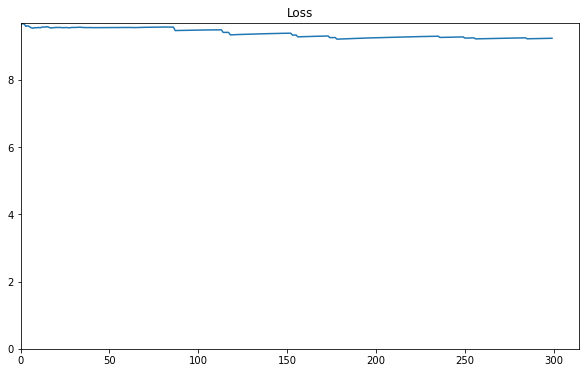

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

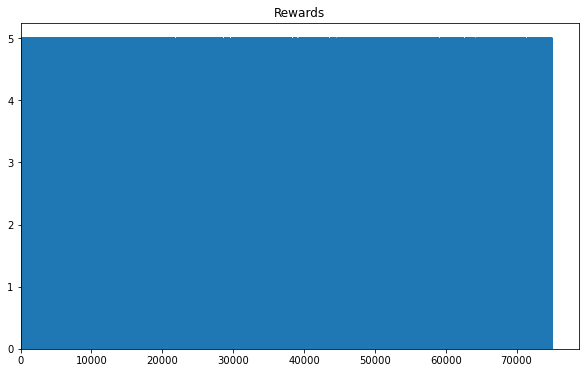

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

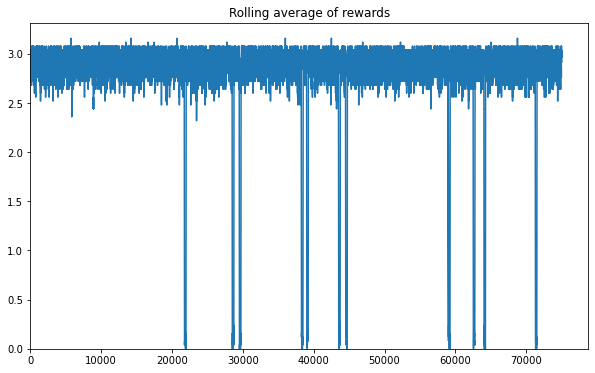

In [8]:
N = 25

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

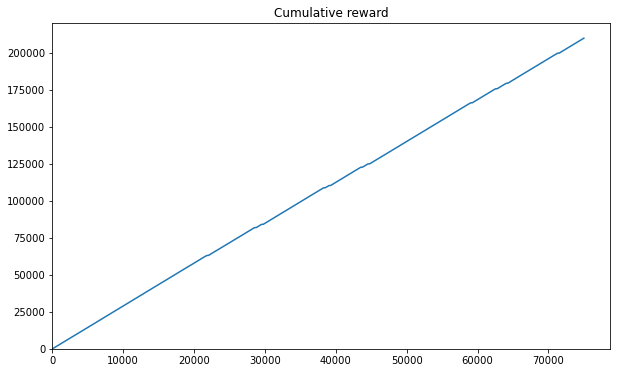

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

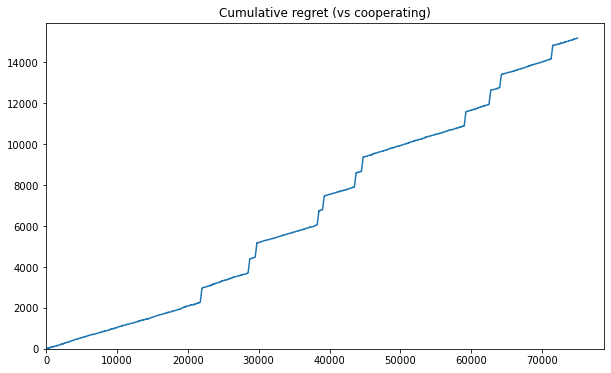

In [16]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [11]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [12]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=2, bias=True)
)

In [13]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:03<00:00, 15.02matches/s] 

OmegaTFT                       827                  7.152921            
Leyvraz                        812                  32.194023           
GraaskampAndKatzen        809                  6.304037000000001   
TitForTat                      807                  5.681995000000001   
GenerousTFT                    805                  5.783982000000001   
SteinAndRapoport               798                  19.772043           
Borufsen                       797                  6.776985000000002   
Pavlov                         794                  5.753013000000001   
TTFT                           789                  5.771051            
White              788                  7.0862739999999995  
Davis                          784                  9.317038            
TidemanAndChieruzzi2    784                  7.738976            
TidemanAndChieruzzi            780                  7.540994            
Weiner                 778                  16.885998           
Grudger   